<a href="https://colab.research.google.com/github/hugoalfedoputra-ub/ml/blob/main/nn_course/T1/Tugas_1_PyTorch_Backprop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='../../data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data',
                                          train=False,
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:15<00:00, 627787.94it/s] 


Extracting ../../data/MNIST/raw/train-images-idx3-ubyte.gz to ../../data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 158309.24it/s]


Extracting ../../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../../data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1494979.42it/s]


Extracting ../../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7430003.42it/s]

Extracting ../../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/MNIST/raw



In [2]:
print('Train dataset size: ', len(train_dataset))
print('test dataset size: ', len(test_dataset))
print('Loaded train size: ', len(train_loader))
print('Loaded test size: ', len(test_loader))

Train dataset size:  60000
test dataset size:  10000
Loaded train size:  600
Loaded test size:  100


In [3]:
import matplotlib.pyplot as plt

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out

In [4]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
losses = []
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # Move tensors to the configured device
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    # Forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if (i+1) % 100 == 0:
      print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
              .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
  correct = 0
  total = 0
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

  print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Epoch [1/5], Step [100/600], Loss: 0.4028
Epoch [1/5], Step [200/600], Loss: 0.2996
Epoch [1/5], Step [300/600], Loss: 0.1651
Epoch [1/5], Step [400/600], Loss: 0.1487
Epoch [1/5], Step [500/600], Loss: 0.1464
Epoch [1/5], Step [600/600], Loss: 0.1447
Epoch [2/5], Step [100/600], Loss: 0.0722
Epoch [2/5], Step [200/600], Loss: 0.0511
Epoch [2/5], Step [300/600], Loss: 0.1084
Epoch [2/5], Step [400/600], Loss: 0.1322
Epoch [2/5], Step [500/600], Loss: 0.0756
Epoch [2/5], Step [600/600], Loss: 0.0586
Epoch [3/5], Step [100/600], Loss: 0.0578
Epoch [3/5], Step [200/600], Loss: 0.0987
Epoch [3/5], Step [300/600], Loss: 0.0406
Epoch [3/5], Step [400/600], Loss: 0.0963
Epoch [3/5], Step [500/600], Loss: 0.0424
Epoch [3/5], Step [600/600], Loss: 0.0348
Epoch [4/5], Step [100/600], Loss: 0.1231
Epoch [4/5], Step [200/600], Loss: 0.1057
Epoch [4/5], Step [300/600], Loss: 0.0489
Epoch [4/5], Step [400/600], Loss: 0.0345
Epoch [4/5], Step [500/600], Loss: 0.0342
Epoch [4/5], Step [600/600], Loss:

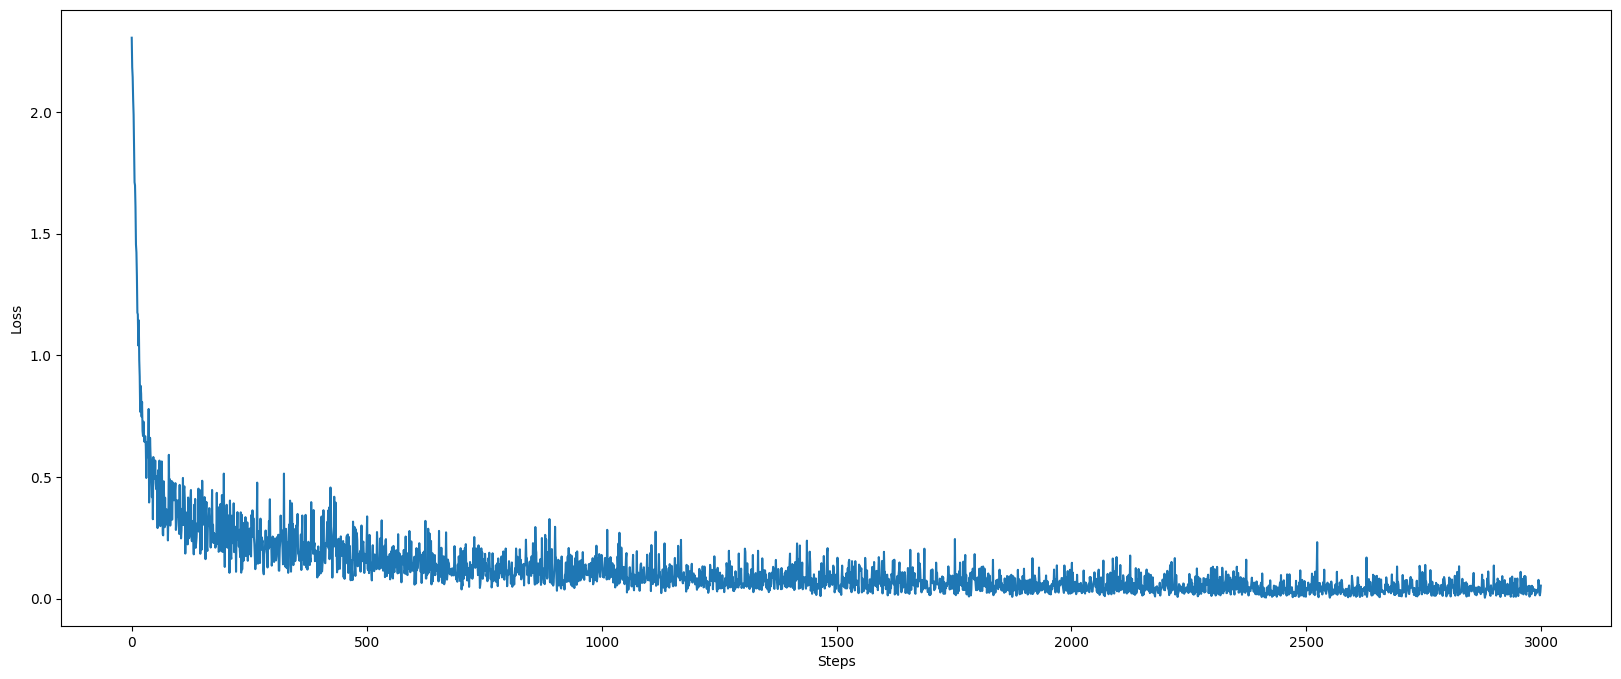

In [5]:
# Plotting penghitungan loss dari model contoh oleh yunjey
plt.figure(figsize=(20,8))
plt.plot(range(3000), losses)
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.show()

In [8]:
!pip install -U "ray[tune]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 MB 11.5 MB/s eta 0:00:00


In [13]:
import ray
from ray import tune
from ray.tune import CLIReporter
from ray.tune.schedulers import ASHAScheduler
import logging

# Ini adalah kelas neural network yang dapat menerima parameter banyak hidden layer, besar
# hidden layer tersebut (dianggap sama untuk semua), satu fungsi aktivasi untuk neuron input
# dan hidden layer, dan implementasi softmax untuk neuron output (apabila softmax=True)
class MyNet(nn.Module):
  def __init__(self, input_size, hidden_size, hidden_layers, activation, num_classes, softmax=False):
    super(MyNet, self).__init__()

    layers = []
    layers.append(nn.Linear(input_size, hidden_size))
    layers.append(activation)

    for _ in range(hidden_layers - 2):
      layers.append(nn.Linear(hidden_size, hidden_size))
      layers.append(activation)

    layers.append(nn.Linear(hidden_size, hidden_size))
    if softmax:
      layers.append(nn.Softmax(dim=1))
    else:
      layers.append(activation)

    layers.append(nn.Linear(hidden_size, num_classes))
    self.layers = nn.Sequential(*layers)

  def forward(self, x):
    return self.layers(x)

# Hyper-parameter tuning menggunakan Ray Tune berdasarkan docs milik PyTorch sendiri:
# https://pytorch.org/tutorials/beginner/hyperparameter_tuning_tutorial.html
ray.shutdown()
ray.init(
  num_cpus=2,
  num_gpus=torch.cuda.device_count(),
  logging_level=logging.INFO
)

# Hyper-parameters untuk eksperimen
# input_size tetap sama
# num_classes tetap sama
config = {
  "hidden_layers": tune.choice([1, 2, 3]),
  "hidden_size": tune.choice([400, 500, 600]),
  "num_epochs": tune.choice(range(3, 9, 1)),
  "batch_size": tune.choice([100, 300, 600]),
  "learning_rate": tune.loguniform(1e-7, 1e-1),
  "activ_funcs": tune.choice([nn.ReLU(), nn.LeakyReLU(), nn.Sigmoid()])
}

# f'hidden_layers={config["hidden_layers"]}, hidden_size={config["hidden_size"]}, num_epochs={config["num_epochs"]}, batch_size={config["batch_size"]}, learning_rate={config["learning_rate"]}, activ_funcs={config["activ_funcs"]}'

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='../../data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data',
                                          train=False,
                                          transform=transforms.ToTensor())

input_size = 784
num_classes = 10

train_dataset_ref = ray.put(train_dataset)
test_dataset_ref = ray.put(test_dataset)

all_losses = {}

def create_model(hidden_size, hidden_layers, activ_func):
  return MyNet(input_size, hidden_size, hidden_layers, activ_func, num_classes, softmax=True)

def train_mnist(config, checkpoint_dir=None):
  train_dataset = ray.get(train_dataset_ref)
  test_dataset = ray.get(test_dataset_ref)

  # Data loaders dengan konfigurasi eksperimen
  train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                              batch_size=config["batch_size"],
                                              shuffle=True)
  test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                            batch_size=config["batch_size"],
                                            shuffle=False)

  # hidden_sizes = [config["hidden_size"] for _ in range(config["hidden_layers"])]
  model = create_model(config["hidden_size"], config["hidden_layers"], config["activ_funcs"]).to(device)

  trial_losses = []

  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=config["learning_rate"])

  # Latih dan uji model (modifikasi dari contoh oleh junjey)
  for epoch in range(config["num_epochs"]):
    for i, (images, labels) in enumerate(train_loader):
      images = images.reshape(-1, 28 * 28).to(device)
      labels = labels.to(device)

      # Forward pass
      outputs = model(images)
      loss = criterion(outputs, labels)

      # Backward pass dan optimasi
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      if (i + 1) % 100 == 0:
        print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
              .format(epoch + 1, config["num_epochs"], i + 1, len(train_loader), loss.item()))

    # Uji model setelah tiap epoch
    with torch.no_grad():
      correct = 0
      total = 0
      for images, labels in test_loader:
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

      accuracy = 100 * correct / total
      print('Epoch [{}/{}], Accuracy: {:.2f}%'.format(epoch + 1, config["num_epochs"], accuracy))

    # Pada tiap epoch, simpan nilai-nilai loss-nya untuk nanti divisualisasikan
    trial_losses.append(loss.item())
    ray.train.report(dict(accuracy=accuracy, loss=loss.item()))

  all_losses[f'hidden_layers={config["hidden_layers"]}, hidden_size={config["hidden_size"]}, num_epochs={config["num_epochs"]}, batch_size={config["batch_size"]}, learning_rate={config["learning_rate"]}, activ_funcs={config["activ_funcs"]}'] = trial_losses

# ASHAScheduler (for early stopping of bad trials)
# ASHAScheduler untuk early stopping
scheduler = ASHAScheduler(
  metric="accuracy",
  mode="max",
  max_t=max(config["num_epochs"]),
  grace_period=1,
  reduction_factor=2)

# Reporter guna men-display hasil-hasil ke console nantinya
reporter = CLIReporter(
  metric_columns=["loss", "accuracy", "training_iteration"])

# Jalankan Ray Tune
analysis = tune.run(
  train_mnist,
  resources_per_trial={"cpu": 1, "gpu": 1 if torch.cuda.is_available() else 0},
  config=config,
  # Banyak kombinasi hyper-parameter yang dapat dicoba (default 10)
  num_samples=10,
  # scheduler=scheduler,
  progress_reporter=reporter,
)

print("Best config is:", analysis.get_best_config(metric="accuracy", mode="max"))
print("All Losses:", all_losses)

2024-09-11 15:47:39,866	INFO worker.py:1783 -- Started a local Ray instance.
2024-09-11 15:47:43,790	WARNING tune.py:902 -- AIR_VERBOSITY is set, ignoring passed-in ProgressReporter for now.


+--------------------------------------------------------------------+
| Configuration for experiment     train_mnist_2024-09-11_15-47-43   |
+--------------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator             |
| Scheduler                        FIFOScheduler                     |
| Number of trials                 10                                |
+--------------------------------------------------------------------+

View detailed results here: /root/ray_results/train_mnist_2024-09-11_15-47-43
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2024-09-11_15-47-37_112795_392/artifacts/2024-09-11_15-47-43/train_mnist_2024-09-11_15-47-43/driver_artifacts`

Trial status: 10 PENDING
Current time: 2024-09-11 15:47:44. Total running time: 0s
Logical resource usage: 0/2 CPUs, 0/0 GPUs
+-------------------------------------------------------------------------------------------------

(train_mnist pid=8671) /usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
(train_mnist pid=8671)   return torch.load(i

(train_mnist pid=8671) Epoch [1/8], Step [100/600], Loss: 2.3004
(train_mnist pid=8671) Epoch [1/8], Step [200/600], Loss: 2.2874
(train_mnist pid=8671) Epoch [1/8], Step [300/600], Loss: 2.2574
(train_mnist pid=8671) Epoch [1/8], Step [400/600], Loss: 2.2414

Trial status: 2 RUNNING | 8 PENDING
Current time: 2024-09-11 15:48:14. Total running time: 30s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
+---------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                status       hidden_layers     hidden_size     num_epochs     batch_size     learning_rate   activ_funcs          |
+---------------------------------------------------------------------------------------------------------------------------------------------+
| train_mnist_2f2e7_00000   RUNNING                  1             500              6            300       0.0756745     Sigmoid()            |
| train_mnist_2f2e7_000

2024-09-11 15:51:28,814	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'activ_funcs': ('__ref_ph', '94aaef4f')}



Trial train_mnist_2f2e7_00001 finished iteration 8 at 2024-09-11 15:51:28. Total running time: 3min 44s
+--------------------------------------------------+
| Trial train_mnist_2f2e7_00001 result             |
+--------------------------------------------------+
| checkpoint_dir_name                              |
| time_this_iter_s                         27.4396 |
| time_total_s                             216.825 |
| training_iteration                             8 |
| accuracy                                   58.18 |
| loss                                     1.93468 |
+--------------------------------------------------+

Trial train_mnist_2f2e7_00001 completed after 8 iterations at 2024-09-11 15:51:28. Total running time: 3min 45s
(train_mnist pid=8671) Epoch [8/8], Accuracy: 58.18%

Trial train_mnist_2f2e7_00000 finished iteration 3 at 2024-09-11 15:51:35. Total running time: 3min 52s
+--------------------------------------------------+
| Trial train_mnist_2f2e7_00000 result   

(train_mnist pid=9698) /usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature. [repeated 2x across cluster]
(train_mnist pi

(train_mnist pid=9698) Epoch [1/4], Step [100/600], Loss: 2.3026

Trial status: 2 RUNNING | 1 TERMINATED | 7 PENDING
Current time: 2024-09-11 15:51:44. Total running time: 4min 0s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                status         hidden_layers     hidden_size     num_epochs     batch_size     learning_rate   activ_funcs              iter     total time (s)     accuracy       loss |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_mnist_2f2e7_00000   RUNNING                    1             500              6            300       0.0756745     Sigmoid()                   3            223.993        67

2024-09-11 15:53:39,787	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'activ_funcs': ('__ref_ph', '7f5561f5')}



Trial train_mnist_2f2e7_00002 finished iteration 4 at 2024-09-11 15:53:39. Total running time: 5min 55s
+--------------------------------------------------+
| Trial train_mnist_2f2e7_00002 result             |
+--------------------------------------------------+
| checkpoint_dir_name                              |
| time_this_iter_s                         30.1517 |
| time_total_s                             120.941 |
| training_iteration                             4 |
| accuracy                                   35.68 |
| loss                                      2.2221 |
+--------------------------------------------------+

Trial train_mnist_2f2e7_00002 completed after 4 iterations at 2024-09-11 15:53:39. Total running time: 5min 55s
(train_mnist pid=9698) Epoch [4/4], Accuracy: 35.68%
(train_mnist pid=9698) Epoch [4/4], Step [600/600], Loss: 2.2221

Trial status: 1 RUNNING | 2 TERMINATED | 7 PENDING
Current time: 2024-09-11 15:53:44. Total running time: 6min 1s
Logical resource us

(train_mnist pid=10298) /usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
(train_mnist pid=10298)   return torch.load


Trial train_mnist_2f2e7_00000 finished iteration 5 at 2024-09-11 15:53:51. Total running time: 6min 7s
+--------------------------------------------------+
| Trial train_mnist_2f2e7_00000 result             |
+--------------------------------------------------+
| checkpoint_dir_name                              |
| time_this_iter_s                         67.7238 |
| time_total_s                             359.354 |
| training_iteration                             5 |
| accuracy                                   67.54 |
| loss                                     0.76031 |
+--------------------------------------------------+
(train_mnist pid=8670) Epoch [5/6], Accuracy: 67.54%
(train_mnist pid=10298) Epoch [1/4], Step [100/600], Loss: 2.2599
(train_mnist pid=10298) Epoch [1/4], Step [200/600], Loss: 2.1970
(train_mnist pid=10298) Epoch [1/4], Step [300/600], Loss: 2.1555
(train_mnist pid=10298) Epoch [1/4], Step [400/600], Loss: 2.1244
(train_mnist pid=10298) Epoch [1/4], Step [500/60

2024-09-11 15:54:56,629	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'activ_funcs': ('__ref_ph', '7f5561f5')}



Trial train_mnist_2f2e7_00000 finished iteration 6 at 2024-09-11 15:54:56. Total running time: 7min 12s
+--------------------------------------------------+
| Trial train_mnist_2f2e7_00000 result             |
+--------------------------------------------------+
| checkpoint_dir_name                              |
| time_this_iter_s                         65.2889 |
| time_total_s                             424.643 |
| training_iteration                             6 |
| accuracy                                   67.29 |
| loss                                       0.836 |
+--------------------------------------------------+

Trial train_mnist_2f2e7_00000 completed after 6 iterations at 2024-09-11 15:54:56. Total running time: 7min 12s
(train_mnist pid=8670) Epoch [6/6], Accuracy: 67.29%
(train_mnist pid=10298) Epoch [3/4], Step [200/600], Loss: 1.8248

Trial train_mnist_2f2e7_00004 started with configuration:
+--------------------------------------------------+
| Trial train_mnist_2

(train_mnist pid=10681) /usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
(train_mnist pid=10681)   return torch.load

(train_mnist pid=10298) Epoch [3/4], Step [400/600], Loss: 1.8055
(train_mnist pid=10681) Epoch [1/6], Step [100/600], Loss: 2.2182

Trial status: 3 TERMINATED | 2 RUNNING | 5 PENDING
Current time: 2024-09-11 15:55:15. Total running time: 7min 31s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                status         hidden_layers     hidden_size     num_epochs     batch_size     learning_rate   activ_funcs              iter     total time (s)     accuracy       loss |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_mnist_2f2e7_00003   RUNNING                    1             600              4            100       0.00

2024-09-11 15:56:01,620	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'activ_funcs': ('__ref_ph', '94aaef4f')}



Trial train_mnist_2f2e7_00003 finished iteration 4 at 2024-09-11 15:56:01. Total running time: 8min 17s
+--------------------------------------------------+
| Trial train_mnist_2f2e7_00003 result             |
+--------------------------------------------------+
| checkpoint_dir_name                              |
| time_this_iter_s                           35.94 |
| time_total_s                              132.03 |
| training_iteration                             4 |
| accuracy                                   77.24 |
| loss                                     1.59513 |
+--------------------------------------------------+

Trial train_mnist_2f2e7_00003 completed after 4 iterations at 2024-09-11 15:56:01. Total running time: 8min 17s
(train_mnist pid=10298) Epoch [4/4], Accuracy: 77.24%
(train_mnist pid=10681) Epoch [2/6], Step [500/600], Loss: 1.7049 [repeated 2x across cluster]

Trial train_mnist_2f2e7_00005 started with configuration:
+-------------------------------------------

(train_mnist pid=11010) /usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
(train_mnist pid=11010)   return torch.load


Trial status: 4 TERMINATED | 2 RUNNING | 4 PENDING
Current time: 2024-09-11 15:56:15. Total running time: 8min 31s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                status         hidden_layers     hidden_size     num_epochs     batch_size     learning_rate   activ_funcs              iter     total time (s)     accuracy       loss |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_mnist_2f2e7_00004   RUNNING                    1             600              6            100       0.000342705   ReLU()                      1            37.3574        67.82   1.92524  |
| train_mnist_2f2e7_00005   RUNNING            

2024-09-11 15:58:38,729	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'activ_funcs': ('__ref_ph', '77862d93')}



Trial train_mnist_2f2e7_00004 finished iteration 6 at 2024-09-11 15:58:38. Total running time: 10min 54s
+--------------------------------------------------+
| Trial train_mnist_2f2e7_00004 result             |
+--------------------------------------------------+
| checkpoint_dir_name                              |
| time_this_iter_s                           35.55 |
| time_total_s                             212.594 |
| training_iteration                             6 |
| accuracy                                   69.41 |
| loss                                     0.98987 |
+--------------------------------------------------+

Trial train_mnist_2f2e7_00004 completed after 6 iterations at 2024-09-11 15:58:38. Total running time: 10min 54s
(train_mnist pid=10681) Epoch [6/6], Accuracy: 69.41%
(train_mnist pid=11010) Epoch [5/6], Step [600/600], Loss: 2.3009 [repeated 2x across cluster]

Trial status: 5 TERMINATED | 1 RUNNING | 4 PENDING
Current time: 2024-09-11 15:58:45. Total running 

(train_mnist pid=11721) /usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
(train_mnist pid=11721)   return torch.load

(train_mnist pid=11010) Epoch [6/6], Step [100/600], Loss: 2.2938
(train_mnist pid=11010) Epoch [6/6], Step [200/600], Loss: 2.2946
(train_mnist pid=11010) Epoch [6/6], Step [300/600], Loss: 2.2976
(train_mnist pid=11010) Epoch [6/6], Step [400/600], Loss: 2.3014
(train_mnist pid=11010) Epoch [6/6], Step [500/600], Loss: 2.2965
(train_mnist pid=11010) Epoch [6/6], Step [600/600], Loss: 2.2946

Trial status: 5 TERMINATED | 2 RUNNING | 3 PENDING
Current time: 2024-09-11 15:59:15. Total running time: 11min 31s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                status         hidden_layers     hidden_size     num_epochs     batch_size     learning_rate   activ_funcs              iter     total time (s)     accuracy       loss |
+---------------------------------------------

2024-09-11 15:59:16,033	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'activ_funcs': ('__ref_ph', '7f5561f5')}



Trial train_mnist_2f2e7_00005 finished iteration 6 at 2024-09-11 15:59:16. Total running time: 11min 32s
+--------------------------------------------------+
| Trial train_mnist_2f2e7_00005 result             |
+--------------------------------------------------+
| checkpoint_dir_name                              |
| time_this_iter_s                          29.731 |
| time_total_s                             185.656 |
| training_iteration                             6 |
| accuracy                                   10.32 |
| loss                                     2.29464 |
+--------------------------------------------------+

Trial train_mnist_2f2e7_00005 completed after 6 iterations at 2024-09-11 15:59:16. Total running time: 11min 32s
(train_mnist pid=11010) Epoch [6/6], Accuracy: 10.32%
(train_mnist pid=11721) Epoch [1/5], Step [100/200], Loss: 1.6237

Trial train_mnist_2f2e7_00007 started with configuration:
+----------------------------------------------------+
| Trial train_mn

(train_mnist pid=11935) /usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
(train_mnist pid=11935)   return torch.load

(train_mnist pid=11935) Epoch [1/8], Step [100/200], Loss: 2.1558

Trial status: 6 TERMINATED | 2 RUNNING | 2 PENDING
Current time: 2024-09-11 15:59:45. Total running time: 12min 1s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                status         hidden_layers     hidden_size     num_epochs     batch_size     learning_rate   activ_funcs              iter     total time (s)     accuracy       loss |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_mnist_2f2e7_00006   RUNNING                    3             400              5            300       0.0415628     Sigmoid()                                               

2024-09-11 16:02:36,631	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'activ_funcs': ('__ref_ph', '7f5561f5')}



Trial train_mnist_2f2e7_00007 finished iteration 8 at 2024-09-11 16:02:36. Total running time: 14min 52s
+--------------------------------------------------+
| Trial train_mnist_2f2e7_00007 result             |
+--------------------------------------------------+
| checkpoint_dir_name                              |
| time_this_iter_s                         24.9393 |
| time_total_s                             190.968 |
| training_iteration                             8 |
| accuracy                                   49.32 |
| loss                                     1.06647 |
+--------------------------------------------------+

Trial train_mnist_2f2e7_00007 completed after 8 iterations at 2024-09-11 16:02:36. Total running time: 14min 52s
(train_mnist pid=11935) Epoch [8/8], Accuracy: 49.32%
(train_mnist pid=11721) Epoch [4/5], Step [100/200], Loss: 1.6827

Trial train_mnist_2f2e7_00008 started with configuration:
+---------------------------------------------------------------+
| Tri

(train_mnist pid=12823) /usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
(train_mnist pid=12823)   return torch.load

(train_mnist pid=12823) Epoch [1/3], Step [100/600], Loss: 2.2995
(train_mnist pid=12823) Epoch [1/3], Step [200/600], Loss: 2.3053
(train_mnist pid=12823) Epoch [1/3], Step [300/600], Loss: 2.3027
(train_mnist pid=11721) Epoch [4/5], Step [200/200], Loss: 1.7027

Trial train_mnist_2f2e7_00006 finished iteration 4 at 2024-09-11 16:03:06. Total running time: 15min 23s
+--------------------------------------------------+
| Trial train_mnist_2f2e7_00006 result             |
+--------------------------------------------------+
| checkpoint_dir_name                              |
| time_this_iter_s                         54.8433 |
| time_total_s                             257.922 |
| training_iteration                             4 |
| accuracy                                   20.91 |
| loss                                      1.7027 |
+--------------------------------------------------+
(train_mnist pid=11721) Epoch [4/5], Accuracy: 20.91%
(train_mnist pid=12823) Epoch [1/3], Step [500

2024-09-11 16:04:03,686	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'activ_funcs': ('__ref_ph', '7f5561f5')}



Trial train_mnist_2f2e7_00006 finished iteration 5 at 2024-09-11 16:04:03. Total running time: 16min 19s
+--------------------------------------------------+
| Trial train_mnist_2f2e7_00006 result             |
+--------------------------------------------------+
| checkpoint_dir_name                              |
| time_this_iter_s                         56.7098 |
| time_total_s                             314.632 |
| training_iteration                             5 |
| accuracy                                   21.12 |
| loss                                     1.83196 |
+--------------------------------------------------+

Trial train_mnist_2f2e7_00006 completed after 5 iterations at 2024-09-11 16:04:03. Total running time: 16min 19s
(train_mnist pid=11721) Epoch [5/5], Accuracy: 21.12%
(train_mnist pid=12823) Epoch [3/3], Step [300/600], Loss: 2.2983 [repeated 2x across cluster]

Trial train_mnist_2f2e7_00009 started with configuration:
+-----------------------------------------

(train_mnist pid=13242) /usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
(train_mnist pid=13242)   return torch.load


Trial status: 8 TERMINATED | 2 RUNNING
Current time: 2024-09-11 16:04:16. Total running time: 16min 32s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                status         hidden_layers     hidden_size     num_epochs     batch_size     learning_rate   activ_funcs              iter     total time (s)     accuracy       loss |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_mnist_2f2e7_00008   RUNNING                    3             500              3            100       3.38914e-06   ...ative_slope=0.01)        2            68.2399        16.26   2.30134  |
| train_mnist_2f2e7_00009   RUNNING                    2  

2024-09-11 16:04:31,499	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'activ_funcs': ('__ref_ph', '94aaef4f')}



Trial train_mnist_2f2e7_00008 finished iteration 3 at 2024-09-11 16:04:31. Total running time: 16min 47s
+--------------------------------------------------+
| Trial train_mnist_2f2e7_00008 result             |
+--------------------------------------------------+
| checkpoint_dir_name                              |
| time_this_iter_s                         38.4426 |
| time_total_s                             106.683 |
| training_iteration                             3 |
| accuracy                                   27.64 |
| loss                                     2.29015 |
+--------------------------------------------------+

Trial train_mnist_2f2e7_00008 completed after 3 iterations at 2024-09-11 16:04:31. Total running time: 16min 47s
(train_mnist pid=12823) Epoch [3/3], Accuracy: 27.64%
(train_mnist pid=13242) Epoch [1/5], Step [200/200], Loss: 2.2071
(train_mnist pid=13242) Epoch [1/5], Accuracy: 63.76%

Trial train_mnist_2f2e7_00009 finished iteration 1 at 2024-09-11 16:04:39. 

2024-09-11 16:05:45,579	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'activ_funcs': ('__ref_ph', '94aaef4f')}
2024-09-11 16:05:45,599	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/root/ray_results/train_mnist_2024-09-11_15-47-43' in 0.0131s.



Trial train_mnist_2f2e7_00009 finished iteration 5 at 2024-09-11 16:05:45. Total running time: 18min 1s
+--------------------------------------------------+
| Trial train_mnist_2f2e7_00009 result             |
+--------------------------------------------------+
| checkpoint_dir_name                              |
| time_this_iter_s                         16.0858 |
| time_total_s                              93.357 |
| training_iteration                             5 |
| accuracy                                   75.88 |
| loss                                      1.9807 |
+--------------------------------------------------+

Trial train_mnist_2f2e7_00009 completed after 5 iterations at 2024-09-11 16:05:45. Total running time: 18min 1s

Trial status: 10 TERMINATED
Current time: 2024-09-11 16:05:45. Total running time: 18min 1s
Logical resource usage: 1.0/2 CPUs, 0/0 GPUs
+-----------------------------------------------------------------------------------------------------------------

In [15]:
!zip -r /tmp/ray/session_2024-09-11_15-47-37_112795_392/artifacts/2024-09-11_15-47-43/train_mnist_2024-09-11_15-47-43/driver_artifacts.zip /tmp/ray/session_2024-09-11_15-47-37_112795_392/artifacts/2024-09-11_15-47-43/train_mnist_2024-09-11_15-47-43/driver_artifacts

  adding: tmp/ray/session_2024-09-11_15-47-37_112795_392/artifacts/2024-09-11_15-47-43/train_mnist_2024-09-11_15-47-43/driver_artifacts/ (stored 0%)
  adding: tmp/ray/session_2024-09-11_15-47-37_112795_392/artifacts/2024-09-11_15-47-43/train_mnist_2024-09-11_15-47-43/driver_artifacts/train_mnist_2f2e7_00002_2_activ_funcs=ref_ph_7f5561f5,batch_size=100,hidden_layers=2,hidden_size=600,learning_rate=0.0000,num_epoc_2024-09-11_15-47-43/ (stored 0%)
  adding: tmp/ray/session_2024-09-11_15-47-37_112795_392/artifacts/2024-09-11_15-47-43/train_mnist_2024-09-11_15-47-43/driver_artifacts/train_mnist_2f2e7_00002_2_activ_funcs=ref_ph_7f5561f5,batch_size=100,hidden_layers=2,hidden_size=600,learning_rate=0.0000,num_epoc_2024-09-11_15-47-43/progress.csv (deflated 56%)
  adding: tmp/ray/session_2024-09-11_15-47-37_112795_392/artifacts/2024-09-11_15-47-43/train_mnist_2024-09-11_15-47-43/driver_artifacts/train_mnist_2f2e7_00002_2_activ_funcs=ref_ph_7f5561f5,batch_size=100,hidden_layers=2,hidden_size=600